3. Feature Engineering

모델 정확도를 높이기 위해서 주어진 데이터를 예측 모델의 문제를 잘 표현할 수 있는 features로 변형시키는 과정 / 머신러닝 알고리즘을 작동하기 위해 데이터의 도메인 지식을 활용해 feature를 만드는 과정  

* features : 모델에 입력하여서 나중에 예측하는 데 사용되는 변수열

In [1]:

import pandas as pd
import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split

# plt.style.use('seaborn-colorblind')
# %matplotlib inline
#from feature_cleaning import rare_values as ra

from sklearn.metrics import roc_curve,  roc_auc_score

In [2]:
use_cols = [
    'Pclass', 'Sex', 'Age', 'Fare', 'SibSp',
    'Survived'
]

data = pd.read_csv('../data/train.csv', usecols=use_cols)
data.head(3)

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,male,22.0,1,7.2500
1,1,1,female,38.0,1,71.2833
2,1,3,female,26.0,0,7.9250


In [3]:
# Note that we include target variable in the X_train 
# because we need it to supervise our discretization
# this is not the standard way of using train-test-split
X_train, X_test, y_train, y_test = train_test_split(data, data.Survived, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 6), (268, 6))

3.1 Feature Scaling

서로 다른 변수(feature)의 값 범위를 일정한 수준으로 맞추는 작업. (ex) 토익, 수능 영어 점수 예시

변수 값의 범위 또는 단위가 달라서 발생 가능한 문제를 예방할 수 있음 -> 머신러닝 모델이 특정한 데이터의 편향성을 갖는 걸 방지할 수 있다. (ex) scaling을 하지 않는다면 더 넓은 범위의 값을 가지는 feature가 거리를 계산하는 주된 기준이 되어 버림.

그래서 거리를 계산하는 KNN이나 경사 하강법, Clustering에 유용하게 쓰임. (위의 예시가 이유)

* 경사 하강법 : https://hi-guten-tag.tistory.com/205
* 경사 하강법에서 Feature Scaling이 유용하게 쓰이는 이유 : https://dodonam.tistory.com/376 (최소 비용 지점은 원이나 타원형의 중앙)

Normalization - Standardization (정균화-표준화) (Z-점수 조정)

평균을 제거하고 단위 분산으로 데이터의 척도를 조정함.

장점 : 표준 정규 분포를 갖도록 재조정해 scale이 큰 feature의 영향이 비대해지는 것을 방지.
단점 : 변수가 왜곡되거나 이상값이 있는 경우 좁은 범위의 관측값을 압축하여 예측력을 손상시킴


* 표준정규분포 : 평균이 0, 분산이 1인 분포.
* 정규화 : 데이터 분포를 0과 1 사이의 범위로 이동하고 재조정시키는 방법. 
* 표준화 :  데이터의 범위를 평균 0 분산 1이 되도록 바꿔주는 것, 측정 값에서 평균을 빼고 표준편차로 나눔.
* Z-점수 : 데이터를 표준화한 값.

In [4]:
# 새로운 feature 생성
from sklearn.preprocessing import StandardScaler

ss = StandardScaler().fit(X_train[['Fare']]) #정규, 표준화
X_train_copy = X_train.copy(deep=True)
X_train_copy['Fare_zscore'] = ss.transform(X_train_copy[['Fare']])
print(X_train_copy.head(6))

     Survived  Pclass     Sex   Age  SibSp     Fare  Fare_zscore
857         1       1    male  51.0      0  26.5500    -0.122530
52          1       1  female  49.0      1  76.7292     0.918124
386         0       3    male   1.0      5  46.9000     0.299503
124         0       1    male  54.0      0  77.2875     0.929702
578         0       3  female   NaN      1  14.4583    -0.373297
549         1       2    male   8.0      1  36.7500     0.089005


* .fit() : 모델을 학습시키는 함수.

In [5]:
print(X_train_copy['Fare_zscore'].mean())
print(X_train_copy['Fare_zscore'].std()) #std : 표준 편차 계산

5.417460665907666e-17
1.000803535686101


Min-Max scaling

각 feature의 크기를 지정된 범위로 조정하여 feature를 변환함. 기본값은 [0,1].

X_scaled = (X - X.min / (X.max - X.min))

단점 : 변수가 왜곡되거나 이상값이 있는 경우 좁은 범위의 관측값을 압축하여 예측력을 손상시킴.

In [6]:
# add the new created feature
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler().fit(X_train[['Fare']]) #최대, 최소화
X_train_copy = X_train.copy(deep=True)
X_train_copy['Fare_minmax'] = mms.transform(X_train_copy[['Fare']])
print(X_train_copy.head(6))

     Survived  Pclass     Sex   Age  SibSp     Fare  Fare_minmax
857         1       1    male  51.0      0  26.5500     0.051822
52          1       1  female  49.0      1  76.7292     0.149765
386         0       3    male   1.0      5  46.9000     0.091543
124         0       1    male  54.0      0  77.2875     0.150855
578         0       3  female   NaN      1  14.4583     0.028221
549         1       2    male   8.0      1  36.7500     0.071731


In [7]:
# check the range of Fare_minmax
print(X_train_copy['Fare_minmax'].max())
print(X_train_copy['Fare_minmax'].min())

1.0
0.0


Robust scaling

이상치의 영향을 최소하한 기법. 중앙값과 IQR을 사용하기 때문에 표준화 후 동일한 값을 더 넓게 분포 시키고 있음을 확인할 수 있음.

X_scaled = (X - X의 중앙값) / IQR

* IQR : Q3 - Q1 (75퍼센타일 - 25퍼센타일) / 4분위 수 이용

장점 : 왜곡된 변수에 대한 변환 후 변수의 확산을 더 잘 보존함.

In [8]:
# add the new created feature
from sklearn.preprocessing import RobustScaler

rs = RobustScaler().fit(X_train[['Fare']]) #Robust scaling
X_train_copy = X_train.copy(deep=True)
X_train_copy['Fare_robust'] = rs.transform(X_train_copy[['Fare']])
print(X_train_copy.head(6))

     Survived  Pclass     Sex   Age  SibSp     Fare  Fare_robust
857         1       1    male  51.0      0  26.5500     0.492275
52          1       1  female  49.0      1  76.7292     2.630973
386         0       3    male   1.0      5  46.9000     1.359616
124         0       1    male  54.0      0  77.2875     2.654768
578         0       3  female   NaN      1  14.4583    -0.023088
549         1       2    male   8.0      1  36.7500     0.927011


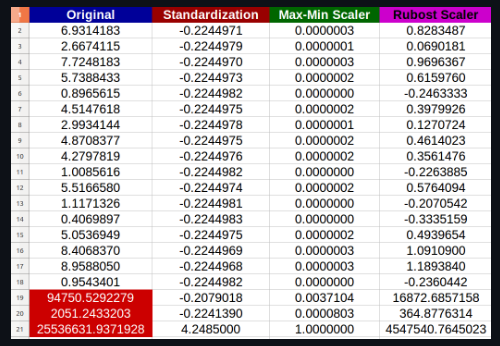

정규화-표준화, 최대-최소 방법은 대부분의 데이터를 좁은 범위로 압축

Robust는 처리된 결과에서 이상치를 제거할 수 없지만 데이터의 확산을 유지하는데 효과적임.

왜곡된 분포 또는 이상값이 있는 경우 정규화-표준화 방법을 사용하는 것은 좋지 않음.

3.2 이산화

* 이산화 : 변수 값의 범위에 걸쳐 일련의 연속 간격을 생성하여 연속 변수를 이산 변수로 변환하는 것.

* 이산화에 대한 구체적 설명 : https://velog.io/@nata0919/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%EC%9D%B4%EC%82%B0%ED%99%94Discretisation-%EC%A0%95%EB%A6%AC

Equal width binning

가능한 값의 범위를 동일한 너비의 N개의 빈으로 나눔. 한 개의 분할 안에 들어가는지와 무관하게 전체 범위에 대해 N분할 적용. (ex) 절대평가

width = (max-min)/N

단점 : 왜곡된 분포에 민감

In [9]:
from sklearn.preprocessing import KBinsDiscretizer
enc_equal_width = KBinsDiscretizer(n_bins=3,encode='ordinal',strategy='uniform').fit(X_train[['Fare']])

# equal width for every bins
enc_equal_width.bin_edges_

array([array([  0.    , 170.7764, 341.5528, 512.3292])], dtype=object)

In [10]:
result = enc_equal_width.transform(X_train[['Fare']])
pd.DataFrame(result)[0].value_counts()

0
0.0    610
1.0     11
2.0      2
Name: count, dtype: int64

In [11]:
# add the new discretized variable
X_train_copy = X_train.copy(deep=True)
X_train_copy['Fare_equal_width'] = enc_equal_width.transform(X_train[['Fare']])
print(X_train_copy.head(10))

     Survived  Pclass     Sex   Age  SibSp      Fare  Fare_equal_width
857         1       1    male  51.0      0   26.5500               0.0
52          1       1  female  49.0      1   76.7292               0.0
386         0       3    male   1.0      5   46.9000               0.0
124         0       1    male  54.0      0   77.2875               0.0
578         0       3  female   NaN      1   14.4583               0.0
549         1       2    male   8.0      1   36.7500               0.0
118         0       1    male  24.0      0  247.5208               1.0
12          0       3    male  20.0      0    8.0500               0.0
157         0       3    male  30.0      0    8.0500               0.0
127         1       3    male  24.0      0    7.1417               0.0


Equal frequency binning (등빈도 비닝)

빈도를 기준으로 범위를 나눔. 연속형 변수를 동일한 구간으로 정렬하는데, 각 분할 안에 동일한 개수의 관측값이 들어감. 따라서 각 간격의 너비는 계산한 특정 분위수를 기반으로 함.

* 분위수 : 확률분포에서 확률변수의 구간을 나누는 기준.

In [12]:
enc_equal_freq = KBinsDiscretizer(n_bins=3,encode='ordinal',strategy='quantile').fit(X_train[['Fare']])
# check the bin edges
enc_equal_freq.bin_edges_

array([array([  0.        ,   8.69303333,  26.2875    , 512.3292    ])],
      dtype=object)

In [13]:
# equal number of case for every bins
result = enc_equal_freq.transform(X_train[['Fare']])
pd.DataFrame(result)[0].value_counts()

0
2.0    209
0.0    208
1.0    206
Name: count, dtype: int64

In [14]:
# add the new discretized variable
X_train_copy = X_train.copy(deep=True)
X_train_copy['Fare_equal_freq'] = enc_equal_freq.transform(X_train[['Fare']])
print(X_train_copy.head(10))

     Survived  Pclass     Sex   Age  SibSp      Fare  Fare_equal_freq
857         1       1    male  51.0      0   26.5500              2.0
52          1       1  female  49.0      1   76.7292              2.0
386         0       3    male   1.0      5   46.9000              2.0
124         0       1    male  54.0      0   77.2875              2.0
578         0       3  female   NaN      1   14.4583              1.0
549         1       2    male   8.0      1   36.7500              2.0
118         0       1    male  24.0      0  247.5208              2.0
12          0       3    male  20.0      0    8.0500              0.0
157         0       3    male  30.0      0    8.0500              0.0
127         1       3    male  24.0      0    7.1417              0.0


K-means binning

유사한 관찰을 구룹화하는 빈을 생성하기 위해 k-mean과 같은 클러스터링 알고리즘을 사용할 수 있음.

* k-means 클러스터링(비지도 학습) : 사전에 클러스터 개수 k와 초기값을 입력하면 각 데이터의 그룹을 할당해 나가는 알고리즘

단점 : 하이퍼 매개변수 조정이 필요함.

* 비지도 학습 : 학습 알고리즘에 결과물이라고 할 수 있는 출력을 미리 제공하지 않고 인공지능이 입력 세트에서 패턴과 상관관계를 찾아내야 하는 머신러닝 알고리즘

![k-mean 클러스터링.png](<attachment:k-mean 클러스터링.png>)
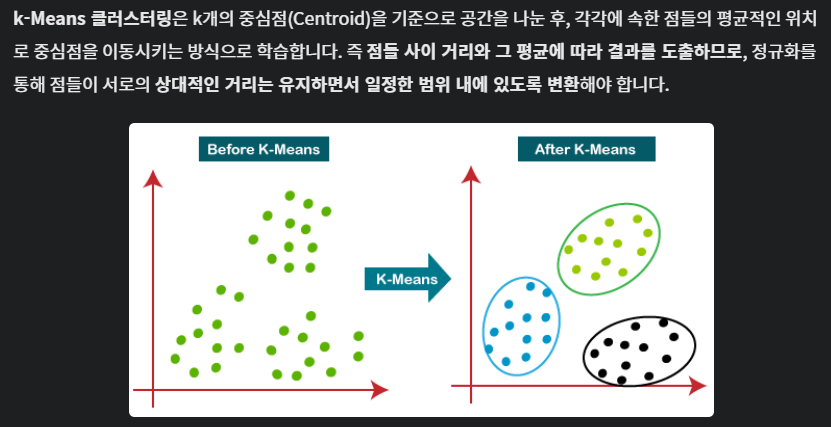

In [15]:
enc_kmeans = KBinsDiscretizer(n_bins=3,encode='ordinal',strategy='kmeans').fit(X_train[['Fare']])
# check the bin edges
enc_kmeans.bin_edges_

c:\Users\wooka\anaconda3\envs\ai\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


array([array([  0.        ,  93.5271531 , 338.08506324, 512.3292    ])],
      dtype=object)

In [16]:
result = enc_kmeans.transform(X_train[['Fare']])
pd.DataFrame(result)[0].value_counts()

0
0.0    587
1.0     34
2.0      2
Name: count, dtype: int64

In [17]:
# add the new discretized variable
X_train_copy = X_train.copy(deep=True)
X_train_copy['Fare_kmeans'] = enc_kmeans.transform(X_train[['Fare']])
print(X_train_copy.head(10))


     Survived  Pclass     Sex   Age  SibSp      Fare  Fare_kmeans
857         1       1    male  51.0      0   26.5500          0.0
52          1       1  female  49.0      1   76.7292          0.0
386         0       3    male   1.0      5   46.9000          0.0
124         0       1    male  54.0      0   77.2875          0.0
578         0       3  female   NaN      1   14.4583          0.0
549         1       2    male   8.0      1   36.7500          0.0
118         0       1    male  24.0      0  247.5208          1.0
12          0       3    male  20.0      0    8.0500          0.0
157         0       3    male  30.0      0    8.0500          0.0
127         1       3    male  24.0      0    7.1417          0.0


Feature Encoding

알고리즘이 해당 값을 처리할 수 있도록 범주형 변수의 문자열을 숫자로 변환해야 함. 알고리즘이 범주형 입력을 사용할 수 있다고 보더라도 알고리즘이 내부에 인코딩 프로세스를 통합할 가능성이 높음.


One-hot encoding

단어 집합의 크기를 벡터의 차원으로 하고, 표현하고 싶은 단어의 인덱스에 1의 값을 부여하고, 다른 인덱스에는 0을 부여하는 단어의 백터 표현 방식.

과정 1. 정수 인코딩 실행 : 각 단어에 고유한 정수를 부여(각 단어의 빈도수를 고려하여 빈도수 순으로 정렬) 2. 표현하고 싶은 안어를 인덱스로 간주하고 해당 위치에 1을 부여하고, 다른 단어의 인덱스의 위치에는 0을 부여

장점 : 해당 변수의 모든 정보 유지

단점 : 해당 변수에 너무 많은 레이블이 있는 경우 기능 공간을 극적으로 확장함. / 변수를 더 예측 가능하게 만들기 위해 추가 값을 추가하지 않음.

In [18]:
data1 = pd.get_dummies(data,drop_first=True) #원-핫 인코딩
data1.head()

,Survived,Pclass,Age,SibSp,Fare,Sex_male
0,0,3,22.0,1,7.2500,True
1,1,1,38.0,1,71.2833,False
2,1,3,26.0,0,7.9250,False
3,1,1,35.0,1,53.1000,False
4,0,3,35.0,0,8.0500,True


Ordinary encoding

서수가 의미 있는 경우 레이블을 서수로 바꿈.

장점 : 아마 알고리즘 수행을 더 좋게 해줄 듯
단점 : 변수를 보다 예측 가능하게 만들기 위해 추가 값을 추가하지 않음.

In [19]:
from category_encoders import *

ord_enc = OrdinalEncoder(cols=['Sex']).fit(X_train,y_train)
data2 = ord_enc.transform(data)
print(data2.head(5))

   Survived  Pclass  Sex   Age  SibSp     Fare
0         0       3    1  22.0      1   7.2500
1         1       1    2  38.0      1  71.2833
2         1       3    2  26.0      0   7.9250
3         1       1    2  35.0      1  53.1000
4         0       3    1  35.0      0   8.0500


Mean encoding

각 카테고리의 값을 학습 데이터의 target 값의 평균값으로 설정하는 것 / label 인코딩과 비슷함. / target은 반드시 0, 1 값이거나 연속적이어야 함.

수치가 비슷할수록 연관성이 높은 것

장점 : 레이블 내의 정보를 캡처하여 더 많은 예측 기능을 렌더링함. / 변수와 대상 사이에 단조로운 관계를 만듦. / 기능 공간을 확장하지 않음.

단점 : 과적합을 일으키는 경향이 있음.

* 과적합 : 모델이 훈련 데이터에 너무 가깝게 맞춰져 새 데이터에 어떻게 대응해야 할 지 모를 때 발생하는 머신러닝 행동.

In [20]:
# cross check-- the mean of target group by Sex
# target = 'Survived'
Sex = X_train['Survived'].groupby(X_train['Sex']).mean()

In [21]:
X_train['Sex_mean'] = X_train['Sex'].map(Sex)
X_train[['Sex', 'Sex_mean']].head()


,Sex,Sex_mean
857,male,0.196078
52,female,0.753488
386,male,0.196078
124,male,0.196078
578,female,0.753488


Target encoding

범주형 자료의 값들을 트레이닝 데이터에서 target에 해당하는 변수로 바꿔주는 방식

장점 : 레이블 내의 정보를 캡처하여 더 많은 예측 기능을 렌더링함. / 변수와 대상 사이에 단조로운 관계를 만듦. / 기능 공간을 확장하지 않음.

단점 : 과적합을 일으키는 경향이 있음.

In [22]:
# create the encoder and fit with our data
target_enc = TargetEncoder(cols=['Sex']).fit(X_train,y_train)
# perform transformation
# data.Survived.groupby(data['Sex']).agg(['mean'])

data.Survived.groupby(data['Sex']).agg(['mean'])


,mean
Sex,
female,0.742038
male,0.188908


WOE encoding

좋고 나쁨(이분법)을 구분하기 위한 그룹핑. (근거가 가설을 얼마나 뒷받침하는지 측정)

이분법에 적합해 로지스틱 회귀에 매우 자주 사용됨

기본 승산비

![WOE 승산비.png](<attachment:WOE 승산비.png>)

![WOE 값.png](<attachment:WOE 값.png>)
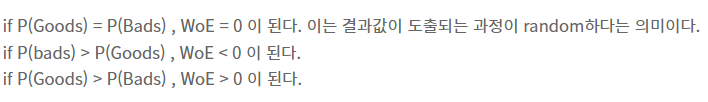
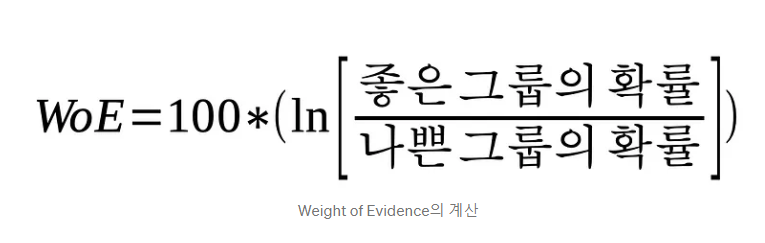

참고 : 선형 회귀에서 원-핫 인코딩을 사용하는 경우 다중 공선성을 피하기 위해 k-1 이진 변수를 유지해야 합니다. 이는 교육 중에 모든 기능을 동시에 보는 모든 알고리즘에 해당됩니다. SVM, 신경망 및 클러스터링을 포함합니다. 반면에 트리 기반 알고리즘은 최상의 분할을 선택하기 위해 전체 이진 변수 세트가 필요합니다.

참고 : 트리 알고리즘과 함께 원-핫 인코딩을 사용하는 것은 권장되지 않습니다. One-hot은 분할이 매우 불균형하게 만들며(원래 범주 기능의 각 레이블이 이제 새로운 기능이 됨) 결과적으로 두 자식 노드 중 어느 것도 순도가 향상되지 않습니다. 원-핫 기능의 예측력은 여러 조각으로 분할되었기 때문에 원래 기능보다 약합니다.

* 트리 기반 모델 : feature space를 여러개의 영역으로 나누는 것을 목표로 동작하는 알고리즘이다. feature space를 평균(회귀) 또는 모드(분류)를 기반으로 주어진 관찰에 대한 예측을 수행한다.

Feature Transform (기능 변환)

선형 회귀 

    알려진 다른 관련 데이터값을 사용하여 알 수 없는 데이터의 값을 예측하는 데이터 분석 기법

    선형 회귀 모델은 비교적 간단하며 예측을 생성하기 위한 해석하기 쉬운 수학 공식을 제공해줌.
    
    다른 예측 변수 X1, X2, ... Xn 을 기반으로 응답 Y를 예측 : Y ≈ β0 + β1X1 + β2X2 + ... + βnXn(선형 관계식)


* 선형 관계 : 변수 간의 관계를 나타낸 개별 값들과 가장 오차가 나지 않는 선을 그었을 때 직선이 나타나는 경우.
* 회귀 : 옛날의 대표적인 상태로 돌아감.

분류

    분류의 경우 로지스틱 회기 분석에서 변수와 배당률 로그 간의 선형 관계를 가정

    Logit(p) = p / (1 - p),  p는 y = 1의 확률(성공 확률)
    
    log(Logit(p)) = β0 + β1X1 + β2X2 + ... + βnXn

* 로지스틱 회귀 분석 : 지정된 독립 변수 데이터 세트를 기반으로 이벤트가 발생할 확률을 추정

선형 가정을 따르는 것이 중요한 이유

    1.  예측 변수 X와 결과 Y 사이에 선형 종속성을 가정하는 경우 이러한 선형 관계가 없으면 모델의 성능이 저하됨.

    2. 선형 관계가 없고 선형/로지스틱 회귀 모델을 사용해야 하는 경우에도 관계를 만드는 데 도움이 될 수 있음.

선형 회귀 가정

    선형 회귀에는 예측 변수 X에 대해 다음과 같은 가정이 있음.

    1. 결과 Y와의 선형 관계

    2. 다변량 정규성

    3. 다중공선성이 없거나 거의 없음

    4. 동분산성

    모델 성능의 대부분은 가우시안과 같은 정규 분포에서 이점을 얻을 수 있음.

* 정규성 가정 : 모든 변수 X가 가우시안 정규 분포를 따라야 함을 의미
* 동분산성 : 분산의 동질성, 오류(즉, 독립 변수(X)와 종속 변수(Y) 사이의 관계에서 잡음)가 전체에서 동일한 상황을 설명함.
* 가우시안 정규 분포 : https://supermemi.tistory.com/entry/%ED%99%95%EB%A5%A0%EA%B3%BC-%ED%86%B5%EA%B3%84-%EC%A0%95%EA%B7%9C%EB%B6%84%ED%8F%AC-normal-distribution-%EA%B0%80%EC%9A%B0%EC%8B%9C%EC%95%88-%EB%B6%84%ED%8F%AC-Gaussian-normal-distribution

기능 변환을 처리하는 방법

1. Logarithmic transformation (대수 변환)

    로그(x+1). 값이 0이 되지 않도록 x 대신 (x+1)을 사용함.

    기울어진 분포에 적용할 때 유용. 낮은 크기 범위에 속하는 값은 확장하는 경향이 있고 높은 크기 범위에 속하는 값은 압축하거나 줄이는 경향이 있어 기울어진 분포(왜곡된 분포)를 정상으로 만드는 데 도움이 되기 때문.

2. Reciprocal transformation (상호 변환)

    1/x. x가 0이 아니어야 함을 경고함.

3. Square root transformation (제곱근 변환)

    x**(1/2)

4. Exponential transformation

    X**(m)

5. Box-cox transformation
    
    (X**λ-1)/λ

    Box와 Cox는 반응 변수를 적절한 비선형 젼환을 통해 정규성을 확보

    변환할 숫자 값이 양수여야 함. 

    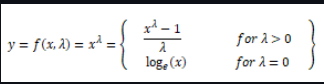

6. Quantile transformation
    
    분위수 정보를 사용하여 균일 또는 정규 분포를 따르도록 변환

    가장 빈번한 값을 분산시키는 경향이 있음. 또한 이상값의 옇향을 줄임.

QQ 플롯을 사용하여 변환 후 변수가 정규 분포(이론적 분위수에 대한 값의 45도 직선)인지 확인 가능.

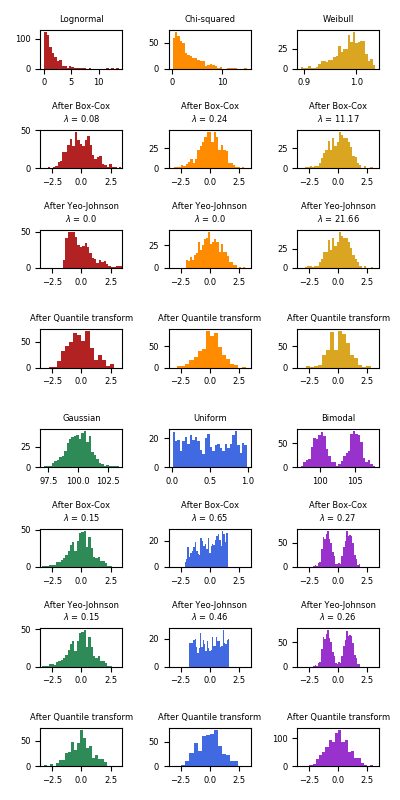

3.5 Feature Generation

정의 : 기존 기능의 조합으로 새로운 기능을 생성함. 데이터 세트에 도메인 지식을 추가하는 좋은 방법임.

3.5.1 누락된 데이터 파생 기능

값이 0, 1인 원시 기능에서 관측값이 누락되었는지 여부를 나타내는 새로운 이진 기능을 만들 수 있음.

3.5.2 단순 통계 파생 특성

원시 기능에 대한 간단한 통계 계산을 수행하여 새로운 기능 생성 

    개수/합계
    평균/중앙값/모드
    최대/최소/stddev/분산/범위/IQR/변동 계수
    시간 범위/간격

예를 들어 통화 기록을 보면 통화 수, 발신/발신 수, 평균 통화 시간, 월 평균 통화 시간, 최대 통화 시간 등과 같은 새로운 기능을 만들 수 있음.

3.5.3 기능 교차 

몇 가지 간단한 통계 파생 기능을 얻은 후 함께 교차시킬 수 있음.

    시간
    지역
    비즈니스 유형

예를 들어 통화 기록을 예로 들면 다음과 같은 교차 기능이 있을 수 있음. 야간/주간 통화 수, 다양한 비즈니스 유형(은행/택시 서비스/여행/접객업)의 통화 수, 지난 3개월 동안의 통화 수 등. 섹션 3.5.2에서 언급한 많은 통계 계산을 다시 사용하여 더 많은 기능을 만들 수 있음.

3.5.4 Ratios(두 양의 상대적 크기) 및 Proportion(전체에서 차지하는 비율)

일반적인 기술. 예를 들어, 지점의 신용카드 매출의 미래 실적을 예측하기 위해서는 신용카드 매출/판매원 또는 신용카드 매출/마케팅 지출과 같은 비율이 지점에서 판매된 절대 카드 수를 사용하는 것보다 더 강력할 것임. (비율로 계산, 예측)

3.5.5 범주형 기능 간의 교차곱

두 가지 가능한 값 {A1, A2}가 있는 범주형 특성 A와 가능성이 있는 {B1, B2}가 있는 특성 B가 있다고 가정.  A와 B 간의 특성 교차는 {(A1, B1), (A1, B2), (A2, B1), (A2, B2)} 값 중 하나를 취함. 기본적으로 이러한 '조합'에 원하는 이름을 지정할 수 있음. 모든 조합은 A와 B의 해당 값에 포함된 정보 간의 시너지 효과를 나타냄.

이것은 특정 기능이 함께 개별적으로 보다 더 나은 속성을 나타낼 때 매우 유용한 기술. 수학적으로 말하면 범주 기능의 가능한 모든 값 사이에서 외적을 수행하는 것과 같음. 개념은 섹션 3.5.3의 기능 교차와 유사하지만 이것은 특히 2개의 범주 기능 사이의 교차를 나타냄.

3.5.8 심층 네트워크에 의한 특징 학습

위에서 볼 수 있듯이 수동으로 기능을 생성하려면 많은 노력이 필요하며 특히 작업할 기능이 많을 때 좋은 결과를 보장하지 못할 수 있음. 트리를 사용한 기능 학습은 기능을 자동으로 생성하는 초기 시도로 볼 수 있으며, 2016년경부터 딥 러닝 방법이 유행하면서 오토인코더 및 제한된 볼츠만 머신과 같은 이 분야에서도 어느 정도 성공을 거두었음. 그들은 자동으로 비지도 또는 준지도 방식으로 기능의 추상적 표현(압축된 형식)을 학습하여 음성 인식, 이미지 분류, 객체 인식 및 기타 영역과 같은 기능을 생성함. 그러나 이러한 기능은 해석 가능성이 제한적이며 딥 러닝은 고품질 결과를 추출하기 위해 훨씬 더 많은 데이터가 필요함.